In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Import the data

In [2]:
data = pd.read_csv('dataset/clean_data_vegan.csv')

In [3]:
data.dropna(subset = ['clean_title'],axis = 0, inplace=True)

In [4]:
cvec_test = CountVectorizer(analyzer ="word", max_features=1000,
                            stop_words='english',ngram_range=(1,2))

data_words = cvec_test.fit_transform(data['clean_title'])

word_frequency = dict(zip(cvec_test.get_feature_names(),data_words.toarray().sum(axis=0)))
word_frequency_df = pd.DataFrame(word_frequency.items(),columns=['word','count'])

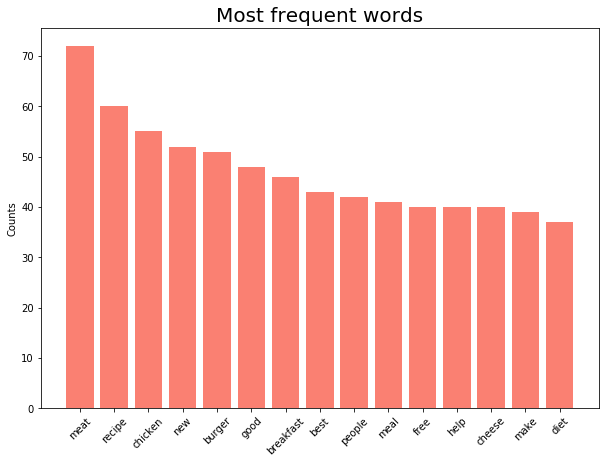

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
top15 = word_frequency_df.sort_values('count', ascending=False).head(15)
plt.bar(top15['word'],top15['count'],color='salmon')
plt.title('Most frequent words',size=20);
plt.ylabel('Counts')
plt.xticks(rotation=45);

In [6]:
for i in data[data['clean_title'].str.contains('mississippi')]['title']:
    print(i)

Makers of 'meatless meatballs' and 'vegan bacon' sue over Mississippi labeling law
Mississippi is forbidding grocery stores from calling veggie burgers “veggie burgers”
Mississippi is forbidding grocery stores from calling veggie burgers “veggie burgers”: Proponents of the law say it’s necessary to avoid confusing consumers. That...doesn’t sound right.
As if it wasn’t already hard enough to have access to new and exciting vegan foods in South Mississippi, now this...
The makers of 'meatless meatballs' and 'vegan bacon' sue over a Mississippi labeling law


In [7]:
for i in data[data['clean_title_selftext'].str.contains("july")]['title_selftext']:
    print(i)

[Other] Friend's Paleo Experience I went to a July 4th gathering with a friend who had adopted a paleo diet a few months ago, in part due to me sharing the benefits I had experienced.  I know over time he had tried a number of different workouts, diets and who knows what else in order to feel better and drop some weight but had never succeeded. He said he had been "dancing with" the number 300lbs. for years and had finally hit it early this year. I think it was a wake up call for him. He had to do something. 

Like everything he does, he crunched the data, learning all he could about the science of paleo (way more deeply than I did) and made a plan. He and his wife follow a paleo diet now and both continue to lose weight, feel better, and are real converts now. 

But what really struck me about talking to him by the grill outside was something he said: 

He said, **"I feel like I finally got the homo sapien user manual after just guessing all these years."** Yeah!  That's it. We've all

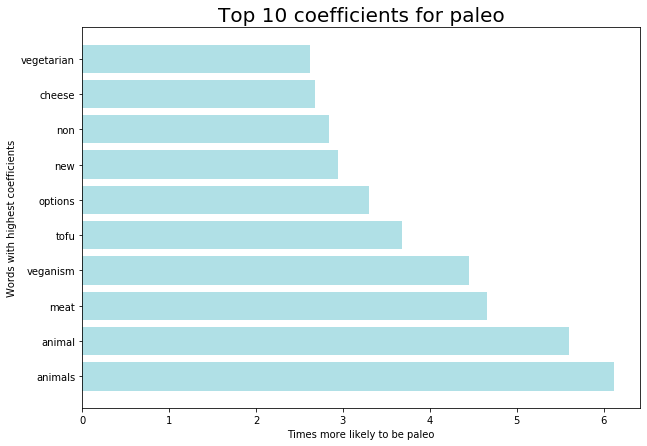

In [8]:
paleo_coef_df = pd.read_csv('dataset/paleo_logistic_coef.csv')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
top10 = paleo_coef_df.sort_values('coefficient', ascending=False).head(10)
plt.barh(top10['word'],top10['coefficient'],color='powderblue');
plt.title('Top 10 coefficients for paleo',size=20);
plt.xlabel('Times more likely to be paleo')
plt.ylabel('Words with highest coefficients');


In [9]:
top10

,word,coefficient
28,animals,6.116116
26,animal,5.600563
557,meat,4.656900
933,veganism,4.446002
898,tofu,3.680908
639,options,3.306006
600,new,2.947575
610,non,2.835549
136,cheese,2.682449
936,vegetarian,2.625116


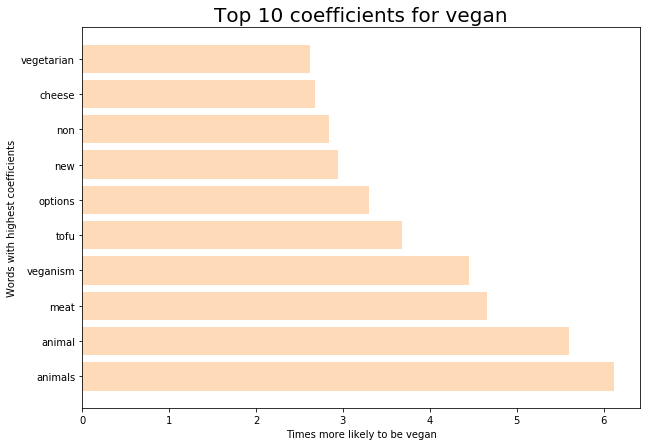

In [10]:
vegan_coef_df = pd.read_csv('dataset/vegan_logistic_coef.csv')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
top10 = vegan_coef_df.sort_values('coefficient', ascending=False).head(10)
plt.barh(top10['word'],top10['coefficient'],color= 'peachpuff')
plt.title('Top 10 coefficients for vegan',size=20);
plt.xlabel('Times more likely to be vegan')
plt.ylabel('Words with highest coefficients');

Note: you may need to restart the kernel to use updated packages.


/Users/valamani/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


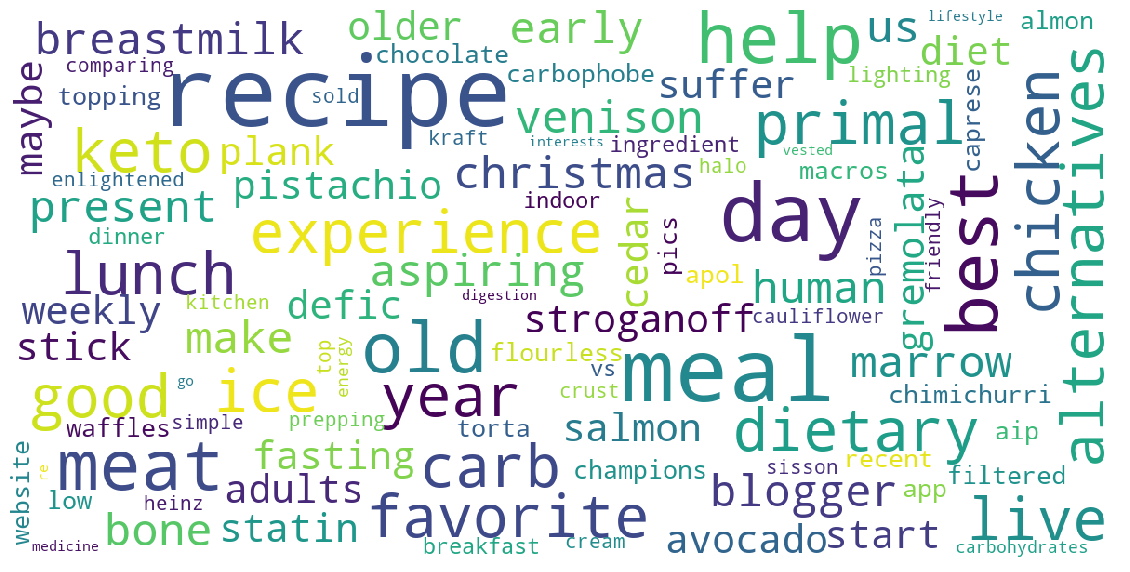

In [11]:
# Got the code from Stack overflow and made adjustments to it.
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=35, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 17))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    fig.show()
    fig.savefig('pic/wordcloud.png',bbox_inches='tight')
    

show_wordcloud(data['clean_title'])

# show_wordcloud(Samsung_Reviews_positive['Reviews'])